In [1]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4_ME').getOrCreate()

# Data description
## Overview of dataset

In [2]:
#load the dataset
df = spark.read.csv('driver_charasteristic.csv', header=True, inferSchema=True)
df.show()
#df.columns
#df.head(1)

+-----+------+---+-----------+-----------------+----------------+-------------------+----------+--------------+
|D_no.|gender|age| Experience|High_speed_acc_lv|Low_speed_acc_lv|High_speed_deacc_lv|aggressive|motor_emission|
+-----+------+---+-----------+-----------------+----------------+-------------------+----------+--------------+
|    1|  male| 37|experienced|                0|               0|                  0|         0|   0.405752109|
|    2|  male| 26|experienced|                0|               0|                  0|         0|   0.420112566|
|    3|female| 51|experienced|                0|               0|                  0|         0|   0.384248646|
|    4|  male| 48|    novince|                0|               0|                  1|         1|   0.483147426|
|    5|  male| 26|experienced|                1|               0|               null|         0|   0.444735788|
|    6|  male| 58|    novince|                1|               0|                  1|         1|   0.525

## Features of datset

In [3]:
#data type
df = df.withColumnRenamed("D_no.","No") #Feature name D_no. may cause functional error of the program which has to be renamed.
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- Experience: string (nullable = true)
 |-- High_speed_acc_lv: integer (nullable = true)
 |-- Low_speed_acc_lv: integer (nullable = true)
 |-- High_speed_deacc_lv: integer (nullable = true)
 |-- aggressive: integer (nullable = true)
 |-- motor_emission: double (nullable = true)



## Data exploration

In [4]:
#data exploration
#Initialize the data table for sql query
df.createOrReplaceTempView('ME')
#aggressive and gender
results = spark.sql("select gender,aggressive,count(gender),mean(motor_emission) from ME group by gender,aggressive")
results.show()
results.na.drop().show()

+------+----------+-------------+-------------------+
|gender|aggressive|count(gender)|avg(motor_emission)|
+------+----------+-------------+-------------------+
|  null|      null|            0|               null|
|female|      null|            4|       0.4429964275|
|  male|         0|          320| 0.4378172056218754|
|  male|      null|            4|      0.44855222725|
|female|         1|           41|        0.591457677|
|female|         0|          147| 0.4335012906530611|
|  male|         1|          141| 0.6529134100851062|
+------+----------+-------------+-------------------+

+------+----------+-------------+-------------------+
|gender|aggressive|count(gender)|avg(motor_emission)|
+------+----------+-------------+-------------------+
|  male|         0|          320| 0.4378172056218754|
|female|         1|           41|        0.591457677|
|female|         0|          147| 0.4335012906530611|
|  male|         1|          141| 0.6529134100851062|
+------+----------+--------

In [5]:
#aggrissive and acceleration rate
results = spark.sql("select aggressive,mean(High_speed_acc_lv),mean(Low_speed_acc_lv),mean(High_speed_deacc_lv),\
                        count(aggressive),mean(motor_emission) from ME group by aggressive")
results.show()
results.na.drop().show()

+----------+----------------------+---------------------+------------------------+-----------------+-------------------+
|aggressive|avg(High_speed_acc_lv)|avg(Low_speed_acc_lv)|avg(High_speed_deacc_lv)|count(aggressive)|avg(motor_emission)|
+----------+----------------------+---------------------+------------------------+-----------------+-------------------+
|      null|                  0.25|   0.3333333333333333|                    0.75|                0|0.44577432737499995|
|         1|    0.9010989010989011|   0.9195402298850575|      0.9395604395604396|              182| 0.6390689866978023|
|         0|    0.2039045553145336| 0.030534351145038167|     0.47956989247311826|              467|0.43645866279443274|
+----------+----------------------+---------------------+------------------------+-----------------+-------------------+

+----------+----------------------+---------------------+------------------------+-----------------+-------------------+
|aggressive|avg(High_speed_acc_

In [6]:
#experience and acceleration rate
results = spark.sql("select Experience,mean(High_speed_acc_lv),mean(Low_speed_acc_lv),mean(High_speed_deacc_lv),\
                        count(Experience),mean(motor_emission) from ME group by Experience")
results.show()
results.na.drop().show()

+-----------+----------------------+---------------------+------------------------+-----------------+-------------------+
| Experience|avg(High_speed_acc_lv)|avg(Low_speed_acc_lv)|avg(High_speed_deacc_lv)|count(Experience)|avg(motor_emission)|
+-----------+----------------------+---------------------+------------------------+-----------------+-------------------+
|    novince|   0.15217391304347827| 0.061224489795918366|      0.9700854700854701|              234|0.45611803235897436|
|       null|                  null|                  1.0|                    null|                0|               null|
|experienced|    0.5344418052256532|   0.3862559241706161|     0.41092636579572445|              423| 0.5129345771891256|
+-----------+----------------------+---------------------+------------------------+-----------------+-------------------+

+-----------+----------------------+---------------------+------------------------+-----------------+-------------------+
| Experience|avg(High_s

In [7]:
#age and acceleration rate
results1 = spark.sql("select mean(age),mean(High_speed_acc_lv),mean(Low_speed_acc_lv),mean(High_speed_deacc_lv),\
                        count(age),mean(motor_emission) from ME where age < 40")
results1.show()
results2 = spark.sql("select mean(age),mean(High_speed_acc_lv),mean(Low_speed_acc_lv),mean(High_speed_deacc_lv),\
                        count(age),mean(motor_emission) from ME where age > 40")
results2.show()

+------------------+----------------------+---------------------+------------------------+----------+-------------------+
|          avg(age)|avg(High_speed_acc_lv)|avg(Low_speed_acc_lv)|avg(High_speed_deacc_lv)|count(age)|avg(motor_emission)|
+------------------+----------------------+---------------------+------------------------+----------+-------------------+
|29.965675057208237|    0.5127020785219399|  0.41225626740947074|      0.5310344827586206|       437| 0.5104570789450803|
+------------------+----------------------+---------------------+------------------------+----------+-------------------+

+-----------------+----------------------+---------------------+------------------------+----------+-------------------+
|         avg(age)|avg(High_speed_acc_lv)|avg(Low_speed_acc_lv)|avg(High_speed_deacc_lv)|count(age)|avg(motor_emission)|
+-----------------+----------------------+---------------------+------------------------+----------+-------------------+
|50.46560846560847|   0.14

## data quality
### Null value

In [8]:
#show the number of different instances
df.groupBy('gender').count().show()
df.groupBy('Experience').count().show()
df.groupBy('aggressive').count().show()
print(df.filter('motor_emission = null').count())
df.groupBy('High_speed_acc_lv').count().show()
df.groupBy('Low_speed_acc_lv').count().show()
df.groupBy('High_speed_deacc_lv').count().show()


+------+-----+
|gender|count|
+------+-----+
|  null|    3|
|female|  192|
|  male|  465|
+------+-----+

+-----------+-----+
| Experience|count|
+-----------+-----+
|    novince|  234|
|       null|    3|
|experienced|  423|
+-----------+-----+

+----------+-----+
|aggressive|count|
+----------+-----+
|      null|   11|
|         1|  182|
|         0|  467|
+----------+-----+

0
+-----------------+-----+
|High_speed_acc_lv|count|
+-----------------+-----+
|             null|    9|
|                1|  260|
|                0|  391|
+-----------------+-----+

+----------------+-----+
|Low_speed_acc_lv|count|
+----------------+-----+
|            null|   90|
|               1|  173|
|               0|  397|
+----------------+-----+

+-------------------+-----+
|High_speed_deacc_lv|count|
+-------------------+-----+
|               null|    5|
|                  1|  400|
|                  0|  255|
+-------------------+-----+



### Outliers

In [9]:
print(df.filter('motor_emission < 0 or motor_emission > 1').count())

0


# Data preparation
## Data cleaning

In [10]:
#droup all instance with null values
df = df.na.drop()
df.show()
print(df.count())

+---+------+---+-----------+-----------------+----------------+-------------------+----------+--------------+
| No|gender|age| Experience|High_speed_acc_lv|Low_speed_acc_lv|High_speed_deacc_lv|aggressive|motor_emission|
+---+------+---+-----------+-----------------+----------------+-------------------+----------+--------------+
|  1|  male| 37|experienced|                0|               0|                  0|         0|   0.405752109|
|  2|  male| 26|experienced|                0|               0|                  0|         0|   0.420112566|
|  3|female| 51|experienced|                0|               0|                  0|         0|   0.384248646|
|  4|  male| 48|    novince|                0|               0|                  1|         1|   0.483147426|
|  6|  male| 58|    novince|                1|               0|                  1|         1|   0.525062254|
|  8|female| 47|experienced|                0|               0|                  0|         0|   0.405924972|
| 10|  mal

## Data construction

In [11]:
import pyspark.sql.functions as F
#Reconstruct feature from string to flag
new_df = df.withColumn("Experienced", F.when(df["Experience"] == "experienced",1).otherwise(0))
new_df = new_df.withColumn("gender_int", F.when(df["gender"] == "male",1).otherwise(0))
new_df.select(['gender','gender_int','Experience','Experienced']).show()


+------+----------+-----------+-----------+
|gender|gender_int| Experience|Experienced|
+------+----------+-----------+-----------+
|  male|         1|experienced|          1|
|  male|         1|experienced|          1|
|female|         0|experienced|          1|
|  male|         1|    novince|          0|
|  male|         1|    novince|          0|
|female|         0|experienced|          1|
|  male|         1|experienced|          1|
|  male|         1|experienced|          1|
|  male|         1|experienced|          1|
|  male|         1|experienced|          1|
|  male|         1|experienced|          1|
|  male|         1|experienced|          1|
|female|         0|experienced|          1|
|  male|         1|experienced|          1|
|  male|         1|experienced|          1|
|female|         0|experienced|          1|
|  male|         1|experienced|          1|
|  male|         1|experienced|          1|
|  male|         1|experienced|          1|
|  male|         1|experienced| 

## example of data integration

In [12]:
df1 = df.select(['No','gender','age'])
df2 = df.select(['No','gender','Experience']).withColumnRenamed("No","No2")
Int_df = df1.join(df2.drop('gender'), df1["No"] == df2["No2"],"leftouter").drop('No2')
df1.show(1)
df2.show(1)
Int_df.show(1)

+---+------+---+
| No|gender|age|
+---+------+---+
|  1|  male| 37|
+---+------+---+
only showing top 1 row

+---+------+-----------+
|No2|gender| Experience|
+---+------+-----------+
|  1|  male|experienced|
+---+------+-----------+
only showing top 1 row

+---+------+---+-----------+
| No|gender|age| Experience|
+---+------+---+-----------+
|  1|  male| 37|experienced|
+---+------+---+-----------+
only showing top 1 row



# Data transformation
## Reduce the data

In [13]:
new_df = new_df.drop('No','gender','Experience')
new_df.show(4)

+---+-----------------+----------------+-------------------+----------+--------------+-----------+----------+
|age|High_speed_acc_lv|Low_speed_acc_lv|High_speed_deacc_lv|aggressive|motor_emission|Experienced|gender_int|
+---+-----------------+----------------+-------------------+----------+--------------+-----------+----------+
| 37|                0|               0|                  0|         0|   0.405752109|          1|         1|
| 26|                0|               0|                  0|         0|   0.420112566|          1|         1|
| 51|                0|               0|                  0|         0|   0.384248646|          1|         0|
| 48|                0|               0|                  1|         1|   0.483147426|          0|         1|
+---+-----------------+----------------+-------------------+----------+--------------+-----------+----------+
only showing top 4 rows



## Data projection

In [14]:
#data normalization
new_df = new_df.withColumn('normalized_age',(new_df['age'] - 20)/40)
new_df.select('age','normalized_age').show(10)

+---+--------------+
|age|normalized_age|
+---+--------------+
| 37|         0.425|
| 26|          0.15|
| 51|         0.775|
| 48|           0.7|
| 58|          0.95|
| 47|         0.675|
| 25|         0.125|
| 24|           0.1|
| 25|         0.125|
| 38|          0.45|
+---+--------------+
only showing top 10 rows



In [15]:
#drop the age column afterwards
new_df = new_df.drop('age')
new_df.show(10)

+-----------------+----------------+-------------------+----------+--------------+-----------+----------+--------------+
|High_speed_acc_lv|Low_speed_acc_lv|High_speed_deacc_lv|aggressive|motor_emission|Experienced|gender_int|normalized_age|
+-----------------+----------------+-------------------+----------+--------------+-----------+----------+--------------+
|                0|               0|                  0|         0|   0.405752109|          1|         1|         0.425|
|                0|               0|                  0|         0|   0.420112566|          1|         1|          0.15|
|                0|               0|                  0|         0|   0.384248646|          1|         0|         0.775|
|                0|               0|                  1|         1|   0.483147426|          0|         1|           0.7|
|                1|               0|                  1|         1|   0.525062254|          0|         1|          0.95|
|                0|             

# spliting dataset (test design)

In [18]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(
    inputCols=["High_speed_acc_lv","Low_speed_acc_lv","High_speed_deacc_lv","aggressive",
               "Experienced", "gender_int", "normalized_age"],
    outputCol="features")
Data = assembler.transform(new_df).select('features','motor_emission')

(trainingData,validatingData, testData) = Data.randomSplit([0.6, 0.2, 0.2])
Data.show(20)

+--------------------+--------------+
|            features|motor_emission|
+--------------------+--------------+
|(7,[4,5,6],[1.0,1...|   0.405752109|
|(7,[4,5,6],[1.0,1...|   0.420112566|
|(7,[4,6],[1.0,0.7...|   0.384248646|
|[0.0,0.0,1.0,1.0,...|   0.483147426|
|[1.0,0.0,1.0,1.0,...|   0.525062254|
|(7,[4,6],[1.0,0.6...|   0.405924972|
|(7,[4,5,6],[1.0,1...|   0.403779716|
|(7,[4,5,6],[1.0,1...|   0.415305164|
|(7,[4,5,6],[1.0,1...|   0.409683008|
|(7,[4,5,6],[1.0,1...|   0.388998558|
|[1.0,0.0,0.0,0.0,...|   0.470359014|
|(7,[4,5,6],[1.0,1...|   0.389981229|
| (7,[4,6],[1.0,0.5])|   0.417141486|
|(7,[4,5,6],[1.0,1...|   0.416627666|
|[1.0,0.0,0.0,0.0,...|   0.471383964|
| (7,[4,6],[1.0,0.9])|   0.403608113|
|(7,[4,5,6],[1.0,1...|   0.398403256|
|(7,[4,5,6],[1.0,1...|   0.414839511|
|(7,[4,5,6],[1.0,1...|   0.421422323|
|(7,[4,5,6],[1.0,1...|    0.41827233|
+--------------------+--------------+
only showing top 20 rows



# Algorithm selection
## Linear regression

In [19]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

#initialize linear regression model
lr = LinearRegression(labelCol='motor_emission')
#lr = LinearRegression(maxIter=100, regParam=0.001, elasticNetParam= 0,labelCol='motor_emission')

# Fit the model
lrModel = lr.fit(trainingData)
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)


Coefficients: [0.048164432541187546,0.12716032579290829,0.04490855762402307,0.03703694748471958,0.002082099795425007,0.000555063078109744,-0.019172624367376597]
Intercept: 0.40926861369796175
numIterations: 1
objectiveHistory: [0.0]
+--------------------+
|           residuals|
+--------------------+
|-0.01139575959783...|
|5.080324021633498E-4|
|0.003297864494007...|
|0.016411487539929603|
|-0.00899476563118...|
|2.367155249982655...|
|0.011283267675462894|
|0.002144268376491454|
|-0.00967311718677...|
|-6.59806577586519...|
|0.002291330519302859|
|-0.00523046021640...|
|-8.02526216406251...|
|0.008033283783593748|
|0.013862425783593757|
| 0.00795690139277816|
|-0.01194245099803...|
|-0.01168452299803...|
|-0.00511844099803...|
|0.006503807001962569|
+--------------------+
only showing top 20 rows

RMSE: 0.009347
r2: 0.992628


In [20]:
## Testing result of Linear regression
# Make predictions.
predictions = lrModel.transform(testData)

# Select example rows to display.
predictions.select("prediction", "motor_emission", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator1 = RegressionEvaluator(
    labelCol="motor_emission", predictionCol="prediction", metricName="rmse")
rmse = evaluator1.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

evaluator2 = RegressionEvaluator(
    labelCol="motor_emission", predictionCol="prediction", metricName="r2")
r2 = evaluator2.evaluate(predictions)
print("Coefficient of determination (r2) on test data = %g" % r2)

+-------------------+--------------+--------------------+
|         prediction|motor_emission|            features|
+-------------------+--------------+--------------------+
| 0.4561599367702834|    0.47321014|(7,[0,4,6],[1.0,1...|
| 0.4447556964969839|   0.433788067|(7,[2,4,6],[1.0,1...|
| 0.4385245935775865|   0.439606618|(7,[2,4,6],[1.0,1...|
| 0.4489804470898816|   0.451224253|(7,[2,5,6],[1.0,1...|
|0.44610455343477506|   0.433955702|(7,[2,5,6],[1.0,1...|
+-------------------+--------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.00953561
Coefficient of determination (r2) on test data = 0.990284


## Decision tree regression

In [21]:
from pyspark.ml.regression import DecisionTreeRegressor


# Train a DecisionTree model.
dt = DecisionTreeRegressor(labelCol="motor_emission")


# Train model.  This also runs the indexer.
model = dt.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "motor_emission", "features").show(5)

# Select (prediction, true label) and compute test error
rmse = evaluator1.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

r2 = evaluator2.evaluate(predictions)
print("Coefficient of determination (r2) on test data = %g" % r2)


print(model)



+------------------+--------------+--------------------+
|        prediction|motor_emission|            features|
+------------------+--------------+--------------------+
|0.4527982563076924|    0.47321014|(7,[0,4,6],[1.0,1...|
|0.4398863658135592|   0.433788067|(7,[2,4,6],[1.0,1...|
|0.4398863658135592|   0.439606618|(7,[2,4,6],[1.0,1...|
|0.4510484704285714|   0.451224253|(7,[2,5,6],[1.0,1...|
|0.4510484704285714|   0.433955702|(7,[2,5,6],[1.0,1...|
+------------------+--------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.0101978
Coefficient of determination (r2) on test data = 0.988888
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_4176b4afaa8a83397df7) of depth 5 with 55 nodes


## Random forest regression

In [22]:
from pyspark.ml.regression import RandomForestRegressor



# Train a RandomForest model.
rf = RandomForestRegressor(labelCol="motor_emission")


# Train model.  This also runs the indexer.
model = rf.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "motor_emission", "features").show(5)

# Select (prediction, true label) and compute test error
rmse = evaluator1.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

r2 = evaluator2.evaluate(predictions)
print("Coefficient of determination (r2) on test data = %g" % r2)

print(model)  # summary only

+-------------------+--------------+--------------------+
|         prediction|motor_emission|            features|
+-------------------+--------------+--------------------+
|  0.447039227675467|    0.47321014|(7,[0,4,6],[1.0,1...|
|0.43484322056194696|   0.433788067|(7,[2,4,6],[1.0,1...|
|0.43224081652057234|   0.439606618|(7,[2,4,6],[1.0,1...|
|0.44104306283034295|   0.451224253|(7,[2,5,6],[1.0,1...|
| 0.4406332291507975|   0.433955702|(7,[2,5,6],[1.0,1...|
+-------------------+--------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.0103108
Coefficient of determination (r2) on test data = 0.98864
RandomForestRegressionModel (uid=rfr_992e4ddae495) with 20 trees


## Gradient-boosted tree regression

In [23]:
from pyspark.ml.regression import GBTRegressor


# Train a GBT model.
gbt = GBTRegressor(labelCol="motor_emission", maxIter=10)



# Train model.  This also runs the indexer.
model = gbt.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "motor_emission", "features").show(5)

# Select (prediction, true label) and compute test error
rmse = evaluator1.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

r2 = evaluator2.evaluate(predictions)
print("Coefficient of determination (r2) on test data = %g" % r2)

print(model)  # summary only


+-------------------+--------------+--------------------+
|         prediction|motor_emission|            features|
+-------------------+--------------+--------------------+
| 0.4527728090017369|    0.47321014|(7,[0,4,6],[1.0,1...|
|0.44080181608008595|   0.433788067|(7,[2,4,6],[1.0,1...|
|0.43444182792516056|   0.439606618|(7,[2,4,6],[1.0,1...|
|0.45082285619957246|   0.451224253|(7,[2,5,6],[1.0,1...|
|0.44759278527313257|   0.433955702|(7,[2,5,6],[1.0,1...|
+-------------------+--------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.0105184
Coefficient of determination (r2) on test data = 0.988178
GBTRegressionModel (uid=GBTRegressor_481a84a5dec0b7a1c308) with 10 trees


## Build model(hyperparameter selection)

In [58]:
#initialize linear regression model
import numpy as np
B_r2 = 0
c = 0
B_enp = 0
for rp in np.arange(0.0, 1, 0.001):
    lr = LinearRegression(maxIter=100, regParam=rp, elasticNetParam= B_enp,labelCol='motor_emission')
    lrModel = lr.fit(trainingData)
    validation = lrModel.transform(validatingData)
    r2 = evaluator2.evaluate(validation)
    if r2 > B_r2:
        B_r2 = r2
        B_rp = rp
for enp in np.arange(0.0, 1, 0.001):
    lr = LinearRegression(maxIter=100, regParam=B_rp, elasticNetParam= enp,labelCol='motor_emission')
    lrModel = lr.fit(trainingData)
    validation = lrModel.transform(validatingData)
    r2 = evaluator2.evaluate(validation)
    if r2 > B_r2:
        B_r2 = r2
        B_enp = enp
print("Best regparam = %g, Best elasticNetparam = %g" % (B_rp, B_enp))
        
print("Best Coefficient of determination (r2) on test data = %g" % B_r2)


Best regparam = 0, Best elasticNetparam = 0
Best Coefficient of determination (r2) on test data = 0.989876


# Data mining

In [25]:
#initialize linear regression model
lr = LinearRegression(maxIter=100, regParam=0, elasticNetParam= 0,labelCol='motor_emission')
# Fit the model
lrModel = lr.fit(trainingData)

## Model details

In [33]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))

coffi_tup = tuple(lrModel.coefficients.tolist())

# Convert sex to an array using Numpy and plot it using pyplot
coffi = spark.createDataFrame([coffi_tup], ("High_speed_acc_lv","Low_speed_acc_lv","High_speed_deacc_lv",
                                            "aggressive", "Experienced", "gender_int", "normalized_age"))
coffi.show()

Coefficients: [0.048164432541187546,0.12716032579290829,0.04490855762402307,0.03703694748471958,0.002082099795425007,0.000555063078109744,-0.019172624367376597]
+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|   High_speed_acc_lv|   Low_speed_acc_lv|High_speed_deacc_lv|         aggressive|         Experienced|         gender_int|      normalized_age|
+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|0.048164432541187546|0.12716032579290829|0.04490855762402307|0.03703694748471958|0.002082099795425007|5.55063078109744E-4|-0.01917262436737...|
+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+



In [27]:
print("Intercept: %s" % str(lrModel.intercept))

Intercept: 0.40926861369796175


In [30]:
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))

numIterations: 1
objectiveHistory: [0.0]


In [31]:
#Performance on training test
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.009347
r2: 0.992628


## Test results

In [29]:
## Testing result of Linear regression
# Make predictions.
predictions = lrModel.transform(testData)

# Select example rows to display.
predictions.select("prediction", "motor_emission", "features").show(5)

# Select (prediction, true label) and compute test error
rmse = evaluator1.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

r2 = evaluator2.evaluate(predictions)
print("Coefficient of determination (r2) on test data = %g" % r2)

+-------------------+--------------+--------------------+
|         prediction|motor_emission|            features|
+-------------------+--------------+--------------------+
| 0.4561599367702834|    0.47321014|(7,[0,4,6],[1.0,1...|
| 0.4447556964969839|   0.433788067|(7,[2,4,6],[1.0,1...|
| 0.4385245935775865|   0.439606618|(7,[2,4,6],[1.0,1...|
| 0.4489804470898816|   0.451224253|(7,[2,5,6],[1.0,1...|
|0.44610455343477506|   0.433955702|(7,[2,5,6],[1.0,1...|
+-------------------+--------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.00953561
Coefficient of determination (r2) on test data = 0.990284


# Interpretation

## Visualization

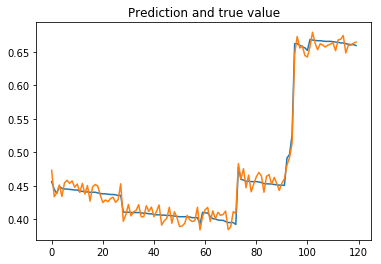

In [54]:
# Import the relevant Python libraries.
import numpy as np
import matplotlib.pyplot as plt
#differences between prediction and true value
plt.plot(predictions.select("prediction").collect())
plt.plot(predictions.select("motor_emission").collect())
plt.title("Prediction and true value")
plt.show()

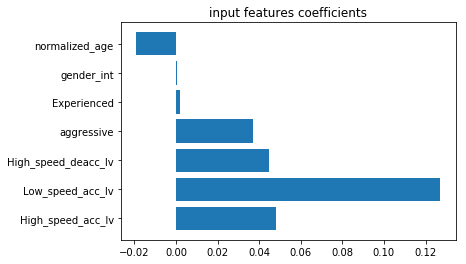

In [55]:
plt.barh(["High_speed_acc_lv","Low_speed_acc_lv","High_speed_deacc_lv",
                                            "aggressive", "Experienced", "gender_int", "normalized_age"],lrModel.coefficients)
plt.title("input features coefficients")
plt.show()

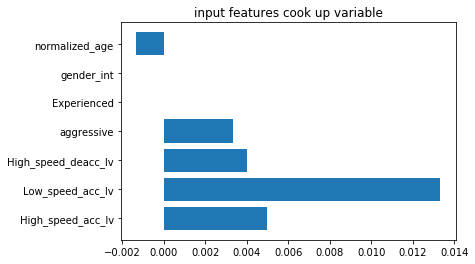

In [57]:
plt.barh(["High_speed_acc_lv","Low_speed_acc_lv","High_speed_deacc_lv",
    "aggressive", "Experienced", "gender_int", "normalized_age"],[0.015/3,0.04/3,0.012/3,0.01/3,0,0,-0.004/3])
plt.title("input features cook up variable")
plt.show()